[*********************100%%**********************]  1 of 1 completed


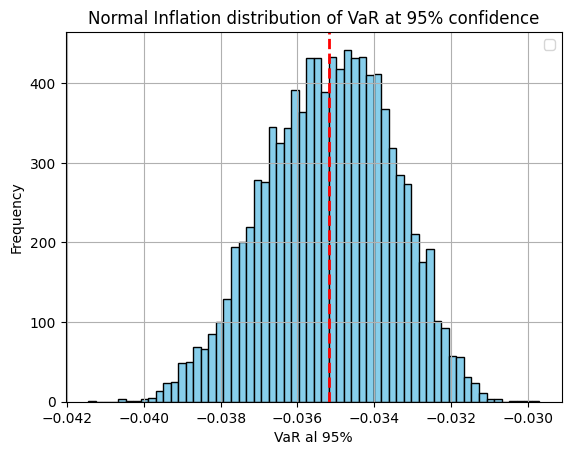

VaR al 95%: -0.03517050206469198


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define el ticker de la acción de la BMV
ticker = 'BOLSAA.MX'

# Descargar datos históricos desde 2018 hasta la fecha actual
historical_data = yf.download(ticker, start='2018-01-01', end='2023-10-30')

# Extraer la columna 'Adj Close' que contiene los precios de cierre ajustados
historical_closing_prices = historical_data['Adj Close']
# Calcular correlacion
correlation = 0.3

# Calcular los rendimientos diarios
daily_returns = historical_closing_prices.pct_change().dropna()

# Define la variable macroeconómica inflacion
macro_variable = np.random.normal(0.0630, 0.0427, len(daily_returns))

# Define un rango de valores para la desviación estándar
std_dev_range = np.linspace(0.035, 0.05, 10000)

# Almacenar los VaR correspondientes a cada valor de desviación estándar
var_95_values = []

for std_dev in std_dev_range:
    macro_returns = np.random.normal(0, std_dev, len(daily_returns)) * correlation
    combined_returns = daily_returns + macro_returns
    var_95 = combined_returns.quantile(0.05)
    var_95_values.append(var_95)

# Calcular la media de los valores de VaR
mean_var_95 = np.mean(var_95_values)

# Crear un histograma que muestra la distribución normal de los valores de VaR
plt.hist(var_95_values, bins=60, color='skyblue', edgecolor='black')
plt.title('Normal Inflation distribution of VaR at 95% confidence')
plt.xlabel('VaR al 95%')
plt.ylabel('Frequency')
plt.axvline(mean_var_95, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()
print("VaR al 95%:", mean_var_95)

# inflación

In [ ]:
print("VaR al 95%:", mean_var_95)

NameError: ignored